# "Covid Tracking Starter Test"
> "Notebook to get started"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Ashutosh Sanzgiri
- categories: [covid]

In [1]:
#hide
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#hide
df = pd.read_csv('http://covidtracking.com/api/states/daily.csv')
states = df.state.unique()

dfk = pd.DataFrame()
for s in states:
    dfs = df[df.state==s].copy()
    dfs['tested'] = dfs['positive'] + dfs['negative']
    dfs['daily_positive_increase'] = dfs['positive'].diff(periods=-1)
    dfs['daily_death_increase'] = dfs['death'].diff(periods=-1)
    dfs['daily_tested_increase'] = dfs['tested'].diff(periods=-1)
    dfk = dfk.append(dfs)
    
dfk = dfk.fillna(0)
df_la = dfk[dfk.state=="LA"]

In [3]:
#hide_input
df_la.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,tested,daily_positive_increase,daily_death_increase,daily_tested_increase
20,20200424,LA,26140.0,117576.0,0.0,1697.0,0.0,0.0,0.0,286.0,...,22,61.0,0.0,0.0,401.0,401.0,143716.0,401.0,61.0,401.0
76,20200423,LA,25739.0,117576.0,0.0,1727.0,0.0,0.0,0.0,274.0,...,22,67.0,0.0,0.0,481.0,481.0,143315.0,481.0,67.0,481.0
132,20200422,LA,25258.0,117576.0,0.0,1747.0,0.0,0.0,0.0,287.0,...,22,68.0,0.0,0.0,404.0,404.0,142834.0,404.0,68.0,404.0
188,20200421,LA,24854.0,117576.0,0.0,1798.0,0.0,0.0,0.0,297.0,...,22,77.0,0.0,0.0,331.0,331.0,142430.0,331.0,77.0,331.0
244,20200420,LA,24523.0,117576.0,0.0,1794.0,0.0,0.0,0.0,332.0,...,22,32.0,0.0,0.0,595.0,595.0,142099.0,595.0,32.0,595.0


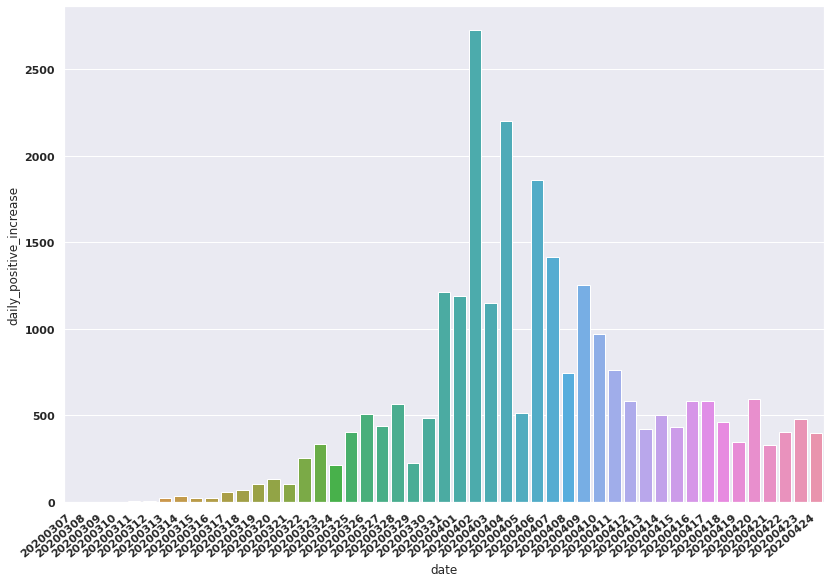

In [4]:
#hide_input
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='date', y= 'daily_positive_increase', data=df_la)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [5]:
#hide
dfk[dfk.state=="OR"].iloc[0]

date                                                        20200424
state                                                             OR
positive                                                        2177
negative                                                       43315
pending                                                            0
hospitalizedCurrently                                            258
hospitalizedCumulative                                           520
inIcuCurrently                                                    56
inIcuCumulative                                                    0
onVentilatorCurrently                                             29
onVentilatorCumulative                                             0
recovered                                                          0
hash                        996ff852af8a8e4293af5cbda7a30aae5c5c2e3a
dateChecked                                     2020-04-24T20:00:00Z
death                             

In [6]:
#collapse-hide
import pandas as pd
import datetime
base_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
yesterday = f"{datetime.datetime.now() - datetime.timedelta(days=1):%m-%d-%Y}"
full_url = f"{base_url}{yesterday}.csv"
df = pd.read_csv(full_url)

In [7]:
#hide_input
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-24 03:30:50,34.223334,-82.461707,23,0,0,23,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-24 03:30:50,30.295065,-92.414197,117,7,0,110,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-24 03:30:50,37.767072,-75.632346,76,2,0,74,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-24 03:30:50,43.452658,-116.241552,635,14,0,621,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-24 03:30:50,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [8]:
df[df.Province_State=="Oregon"]['Confirmed'].sum()

2127

In [9]:
#hide
!pip install seaborn

In [10]:
import pandas as pd
import datetime
base_url="https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(base_url)

In [11]:
df = df.drop(['Lat', 'Long'], axis=1)

In [12]:
ncountries = sorted(df['Country/Region'].unique().tolist())

In [13]:
#ncountries

In [14]:
dfa = pd.DataFrame()
for i, country in enumerate(ncountries):
    dfc = df[df['Country/Region'] == country].copy()
    if len(dfc) > 1:
        dfc = dfc.drop(['Province/State'], axis=1).groupby('Country/Region').sum().reset_index()
    else:
        dfc = dfc.drop(['Province/State'], axis=1)
    dfc2 = dfc.melt(id_vars=["Country/Region"], 
                        var_name="Date",
                        value_name="cases")
    dfc2 = dfc2.rename({'Country/Region': 'country'}, axis=1)
    dfa = dfa.append(dfc2)

In [15]:
dfa[dfa.country=="France"].tail(20)

,country,Date,cases
73,France,4/4/20,69500
74,France,4/5/20,71412
75,France,4/6/20,75343
76,France,4/7/20,79163
77,France,4/8/20,83057
78,France,4/9/20,87366
79,France,4/10/20,91738
80,France,4/11/20,94863
81,France,4/12/20,121712
82,France,4/13/20,125394


In [16]:
dfa.country.nunique()

185

In [17]:
df = df.drop(['Province/State'], axis=1).groupby('Country/Region').sum().reset_index()

In [18]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
1,Albania,0,0,0,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
2,Algeria,0,0,0,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,Andorra,0,0,0,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
4,Angola,0,0,0,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25


In [19]:
df3 = df.T

In [20]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [21]:
df2 = df.melt(id_vars=["Country/Region"], 
        var_name="Date",
        value_name="cases")
df2 = df2.rename({'Country/Region': 'country'}, axis=1)

In [22]:
df2[df2.country=="China"]

,country,Date,cases
36,China,1/22/20,548
221,China,1/23/20,643
406,China,1/24/20,920
591,China,1/25/20,1406
776,China,1/26/20,2075
...,...,...,...
16316,China,4/19/20,83805
16501,China,4/20/20,83817
16686,China,4/21/20,83853
16871,China,4/22/20,83868


In [23]:
import pandas as pd
url="https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)

In [24]:
#df = df.drop(['Lat', 'Long'], axis=1)
ncountries = df['Country/Region'].unique().tolist()

In [25]:
dfb = pd.DataFrame()
for i, country in enumerate(ncountries):
    dfc = df[df['Country/Region'] == country].copy()
    if len(dfc) > 1:
        dfc = dfc.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
    else:
        dfc = dfc.drop(['Province/State', 'Lat', 'Long'], axis=1)
    dfc = dfc.rename({'Country/Region': 'country', 'Date': 'date'}, axis=1)
    dfc = dfc.T
    #dfc['date'] = pd.to_datetime(dfc['date'])
    dfb = dfb.append(dfc)

In [26]:
dfc = df[df['Country/Region'] == "China"].copy()
if len(dfc) > 1:
    dfc = dfc.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
else:
    dfc = dfc.drop(['Province/State', 'Lat', 'Long'], axis=1)
dfc = dfc.rename({'Country/Region': 'country', 'Date': 'date'}, axis=1)
dfc = dfc.T

In [27]:
dfc.head()

,0
country,China
1/22/20,548
1/23/20,643
1/24/20,920
1/25/20,1406
